In [ ]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('dataset.csv')


In [ ]:
df.head() #Display Top 5 Rows of The Dataset


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.tail() #Check Last 5 Rows of The Dataset


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
59300,9,CASH_IN,65860.73,C1195479057,22200000.0,22300000.0,C766671686,3281685.21,4513619.47,0.0,0.0
59301,9,CASH_IN,79056.73,C413780397,22300000.0,22400000.0,C27489818,84281.97,5225.24,0.0,0.0
59302,9,CASH_IN,61395.61,C1012845768,22400000.0,22400000.0,C592593207,640791.86,1848375.70,0.0,0.0
59303,9,CASH_IN,127486.85,C1876536623,22400000.0,22500000.0,C471719646,261529.11,197891.83,0.0,0.0
59304,9,CASH_IN,199887.90,C609450461,22500000.0,22700000.0,C2024103961,379883.72,7500.00,NaN,NaN


In [ ]:
df.shape  #(Number of Rows And Number of Columns)


(59305, 11)

In [ ]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 59305
Number of Columns 11


In [ ]:
df.info()  #Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            59305 non-null  int64  
 1   type            59305 non-null  object 
 2   amount          59305 non-null  float64
 3   nameOrig        59305 non-null  object 
 4   oldbalanceOrg   59305 non-null  float64
 5   newbalanceOrig  59305 non-null  float64
 6   nameDest        59305 non-null  object 
 7   oldbalanceDest  59305 non-null  float64
 8   newbalanceDest  59305 non-null  float64
 9   isFraud         59304 non-null  float64
 10  isFlaggedFraud  59304 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.0+ MB


In [ ]:
df.isnull().sum()                   #Check Null Values In The Dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
# Fill null values in `isFraud` and `isFlaggedFraud` with the mode (most frequent value)
df['isFraud'].fillna(df['isFraud'].mode()[0], inplace=True)
df['isFlaggedFraud'].fillna(df['isFlaggedFraud'].mode()[0], inplace=True)
# Fill null values in 'oldbalanceDest' and 'newbalanceDest' with the mean of each column
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(), inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(), inplace=True)


# Verify that there are no more null values in the DataFrame
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# finding duplicate values
df.duplicated().sum()

0

In [ ]:
from scipy import stats  #handle outliers
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
# Ensure balances are non-negative
df = df[(df['oldbalanceOrg'] >= 0) & (df['newbalanceOrig'] >= 0) & (df['oldbalanceDest'] >= 0) & (df['newbalanceDest'] >= 0)]


In [ ]:
# Label Encoding for the 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


In [ ]:
# Ensure the 'isFraud' column is correctly typed as integer
df['isFraud'] = df['isFraud'].astype(int)

In [ ]:
# Verify the target variable has only expected values
print("Unique values in 'isFraud':", df['isFraud'].unique())


Unique values in 'isFraud': []


In [ ]:
# Convert categorical variables to one-hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [ ]:
# Drop irrelevant columns like 'nameOrig' and 'nameDest'
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
# Transaction Time Features
df['hour_of_day'] = df['step'] % 24  # Extract hour of the day


In [ ]:
# Transaction Amount Log Transformation
df['log_amount'] = df['amount'].apply(lambda x: np.log(x + 1))  # Log transformation with 1 added to avoid log(0)

In [ ]:
# Transaction Amount Ratios
df['orig_bal_change'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['dest_bal_change'] = df['newbalanceDest'] - df['oldbalanceDest']


In [ ]:
# Customer Behavior Features
df['avg_amount'] = (df['oldbalanceOrg'] + df['newbalanceOrig']) / 2
df['freq_transaction'] = 1  # Placeholder for demonstration, should be based on actual data

In [ ]:
# Fraud Detection Features
df['large_transaction'] = (df['amount'] > df['amount'].mean() + 2 * df['amount'].std()).astype(int)

In [ ]:
# Account Balance Changes
df['orig_bal_change_ratio'] = df['orig_bal_change'] / df['oldbalanceOrg']
df['dest_bal_change_ratio'] = df['dest_bal_change'] / df['oldbalanceDest']

In [ ]:
# Display the modified DataFrame
print(df)

        step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815       170136.0   
1          1   PAYMENT     1864.28  C1666544295        21249.0   
2          1  TRANSFER      181.00  C1305486145          181.0   
3          1  CASH_OUT      181.00   C840083671          181.0   
4          1   PAYMENT    11668.14  C2048537720        41554.0   
...      ...       ...         ...          ...            ...   
287861    15  CASH_OUT   117894.49   C491122823            0.0   
287862    15  CASH_OUT   291455.81  C1788406097            0.0   
287863    15  CASH_OUT   329222.78  C1028809455        11442.0   
287864    15  CASH_OUT   559761.37   C271314554       118660.0   
287865    15  TRANSFER  1348812.53   C584639792        69229.0   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00      0.0   
1             19384.72  M2044282225            

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

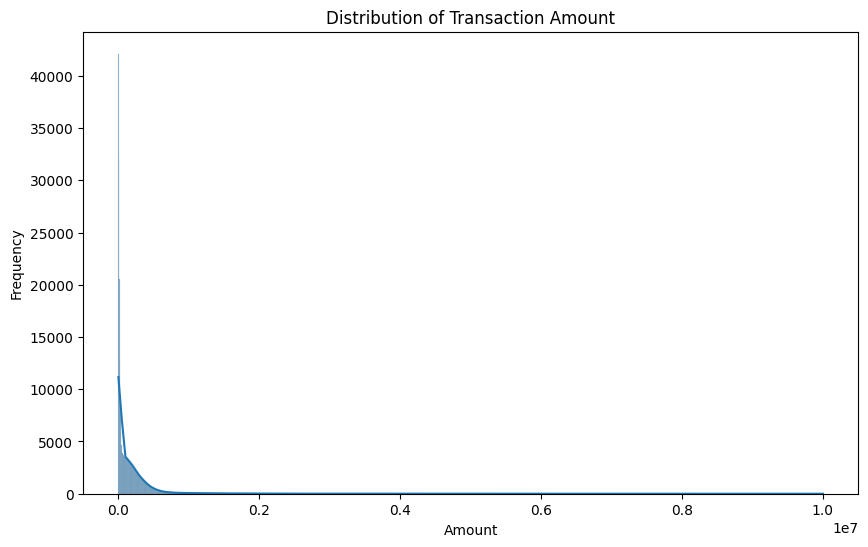

In [ ]:
# Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

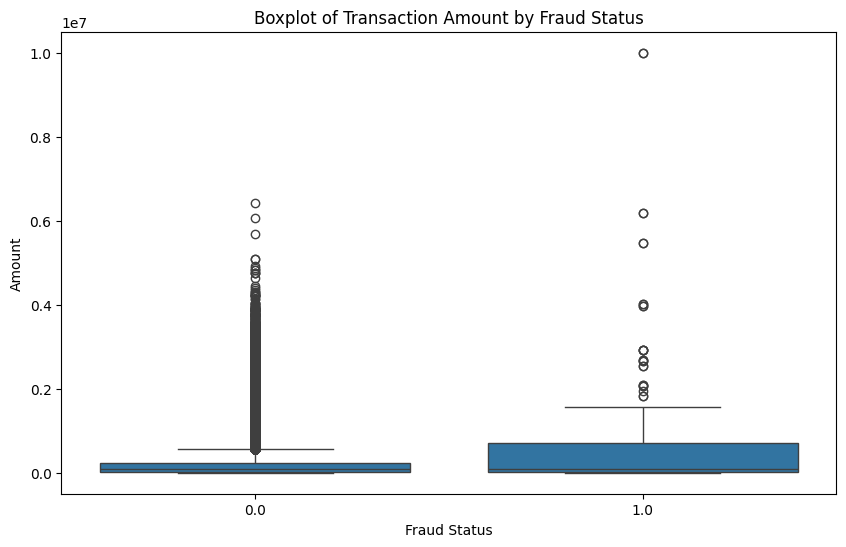

In [ ]:
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Boxplot of Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Drop non-numeric and target columns for feature importance analysis
X = df.drop(['isFraud', 'isFlaggedFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']


In [ ]:
# Check and fill missing values in y
y.fillna(y.mode()[0], inplace=True)


In [ ]:
# Fill missing values with the mean for numeric features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
# Ensure all features are numeric
X = X.apply(pd.to_numeric)

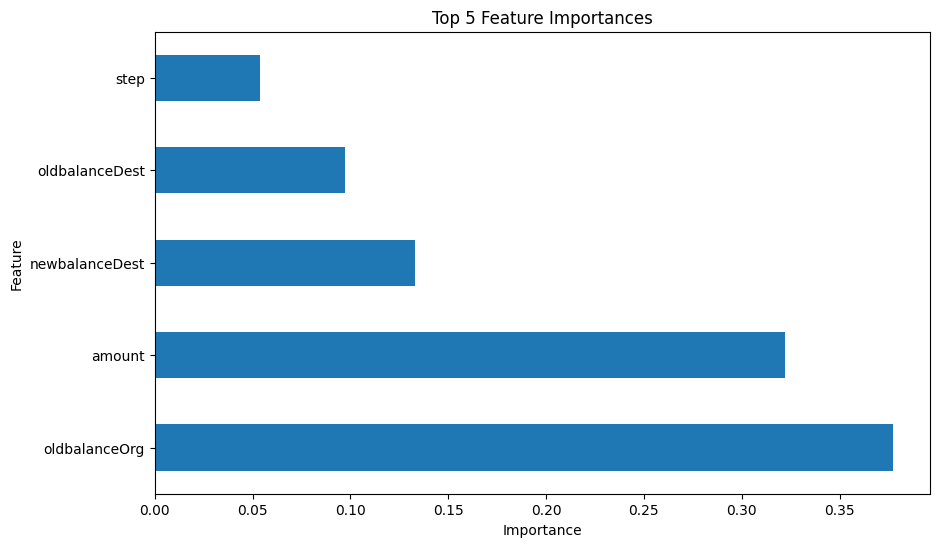

In [ ]:
# Perform feature importance analysis using Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.nlargest(5).plot(kind='barh')
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

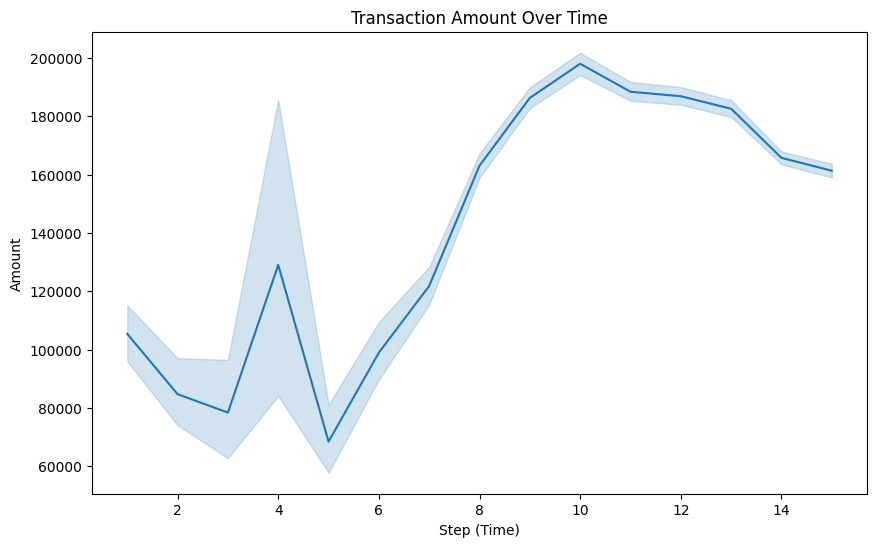

In [ ]:
# Time Series Analysis (assuming step represents timestamp)
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='amount', data=df)
plt.title('Transaction Amount Over Time')
plt.xlabel('Step (Time)')
plt.ylabel('Amount')
plt.show()

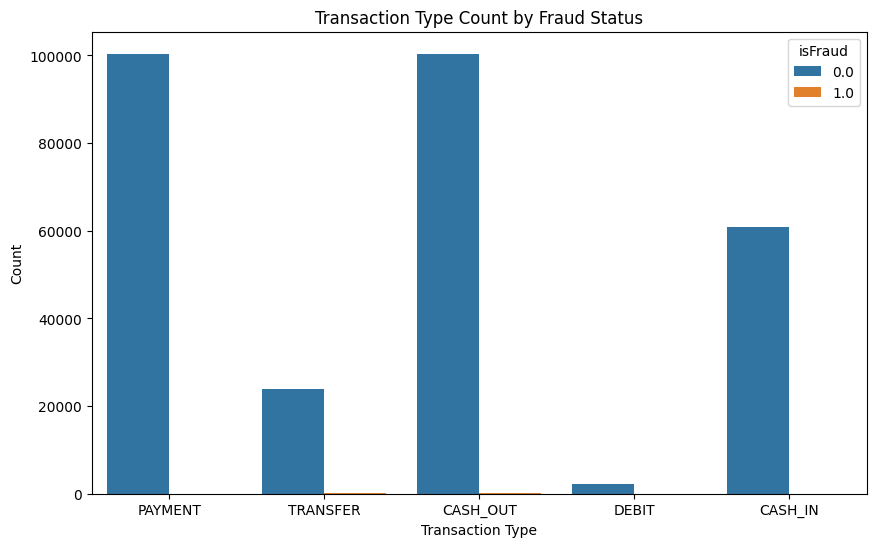

In [ ]:
# Transaction Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type Count by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Encode categorical features
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# Drop non-numeric columns that are not useful for model training
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:

# Define feature matrix X and target vector y
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

# Fill NaN values if any (for demonstration purposes, assuming no NaN in this dataset)
df.fillna(df.mean(), inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

In [ ]:
# Transform the test data using the trained imputer (do not fit again)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Handle missing values in y
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_test.mode()[0], inplace=True)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_imputed, y_train)


LogisticRegression(random_state=42)

In [ ]:

# Make predictions
y_pred = model.predict(X_test_imputed)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9972346786248132
Confusion Matrix:
 [[13343     0]
 [   37     0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13343
         1.0       0.00      0.00      0.00        37

    accuracy                           1.00     13380
   macro avg       0.50      0.50      0.50     13380
weighted avg       0.99      1.00      1.00     13380



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Check for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

In [ ]:
# Ensure target variable does not contain NaN values
df.dropna(subset=['isFraud'], inplace=True)

In [ ]:
# Split the dataset into features and target
X = df.drop(columns=['isFraud'])
y = df['isFraud'].astype(int)  # Ensure y is of integer type

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Check for NaN values in features and target
print("NaN values in features (X_train):\n", X_train.isnull().sum())
print("NaN values in target (y_train):\n", y_train.isnull().sum())

NaN values in features (X_train):
 step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64
NaN values in target (y_train):
 0


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9982062780269059
Confusion Matrix:
 [[8894    0]
 [  16   10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8894
           1       1.00      0.38      0.56        26

    accuracy                           1.00      8920
   macro avg       1.00      0.69      0.78      8920
weighted avg       1.00      1.00      1.00      8920

